In [ ]:
from pathlib import Path
import sys

sys.path.append(str(Path(__file__).parent))

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from matrix import generate_symmetric_adjacency_matrices_3_eigenvalues, draw_with_big_loops



ModuleNotFoundError: No module named 'matrix'

In [2]:
n = 4
matrices = generate_symmetric_adjacency_matrices_3_eigenvalues(n)

print(f"Found {len(matrices)} symmetric adjacency matrices of size {n}x{n}")
print(f"with exactly 3 distinct eigenvalues\n")

# Display first few matrices and their eigenvalues
for i, mat in enumerate(matrices):
    eigenvalues = np.linalg.eigvalsh(mat)
    print(f"Matrix {i+1}:")
    print(mat)
    print(f"Eigenvalues: {eigenvalues}")
    print(f"Distinct eigenvalues: {np.unique(np.round(eigenvalues, 9))}\n")


Found 25 symmetric adjacency matrices of size 4x4
with exactly 3 distinct eigenvalues

Matrix 1:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]
Eigenvalues: [-1.  0.  0.  1.]
Distinct eigenvalues: [-1.  0.  1.]

Matrix 2:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 1]]
Eigenvalues: [-0.61803399  0.          0.          1.61803399]
Distinct eigenvalues: [-0.61803399  0.          1.61803399]

Matrix 3:
[[0 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 1 0]]
Eigenvalues: [-1.41421356e+00 -8.06646416e-17  0.00000000e+00  1.41421356e+00]
Distinct eigenvalues: [-1.41421356 -0.          1.41421356]

Matrix 4:
[[0 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 1 1]]
Eigenvalues: [-1.0000000e+00 -1.4989095e-16  0.0000000e+00  2.0000000e+00]
Distinct eigenvalues: [-1. -0.  2.]

Matrix 5:
[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]]
Eigenvalues: [-1.  0.  1.  1.]
Distinct eigenvalues: [-1.  0.  1.]

Matrix 6:
[[0 0 0 0]
 [0 0 1 1]
 [0 1 0 1]
 [0 1 1 0]]
Eigenvalues: [-1. -1.  0.  2.]
Distinct eigenvalues: [-1.  0.  2.]

Mat

In [3]:
count = {}
for mat in matrices:
    t = np.trace(mat)
    count[t] = count.get(t, 0) + 1

count


{np.int64(0): 5,
 np.int64(1): 7,
 np.int64(2): 3,
 np.int64(3): 5,
 np.int64(4): 5}

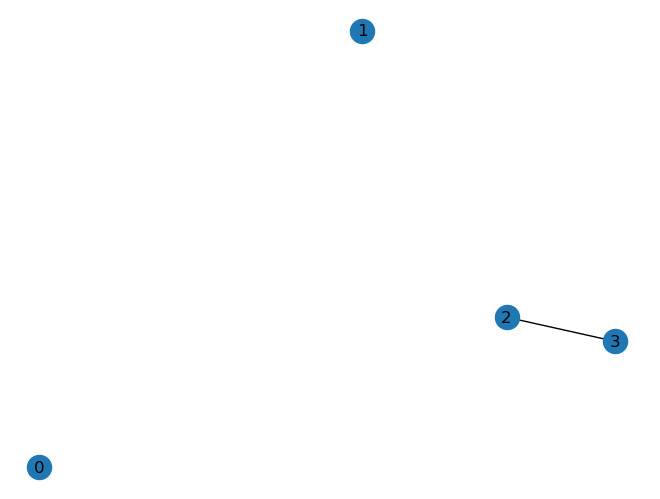

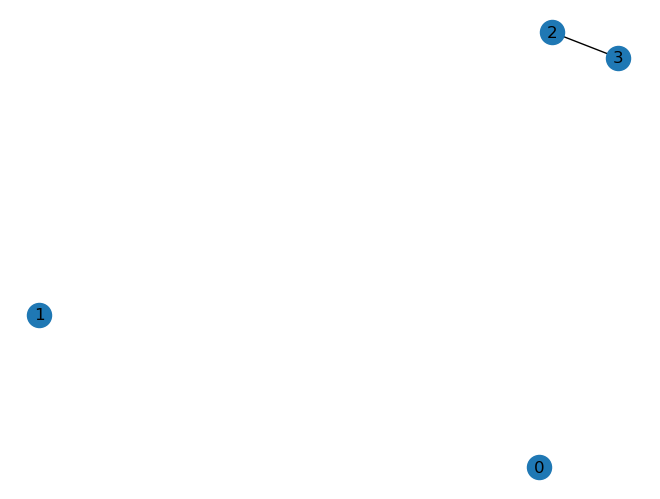

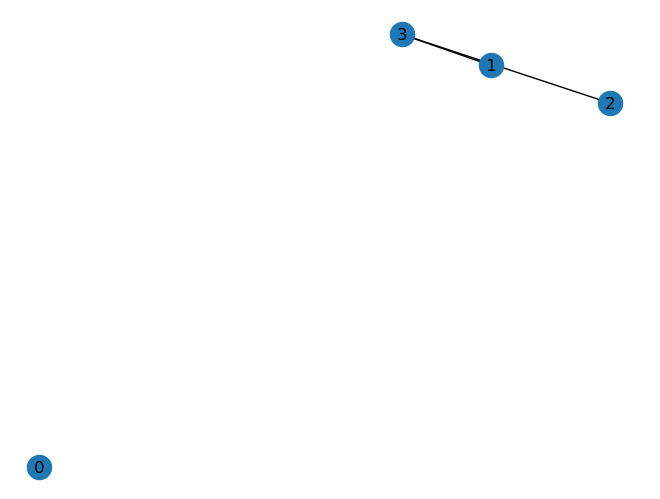

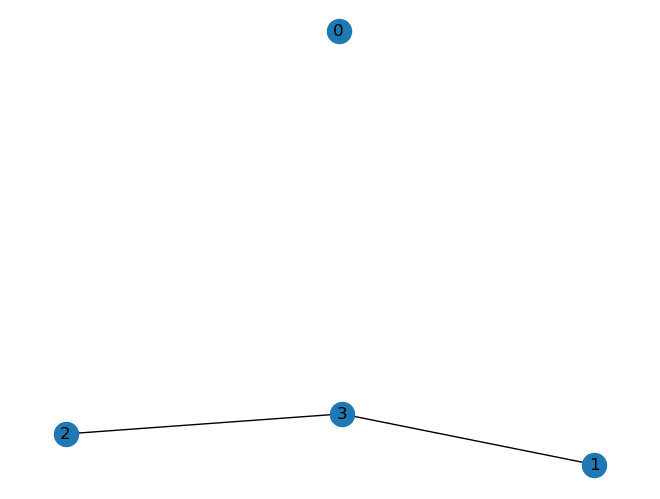

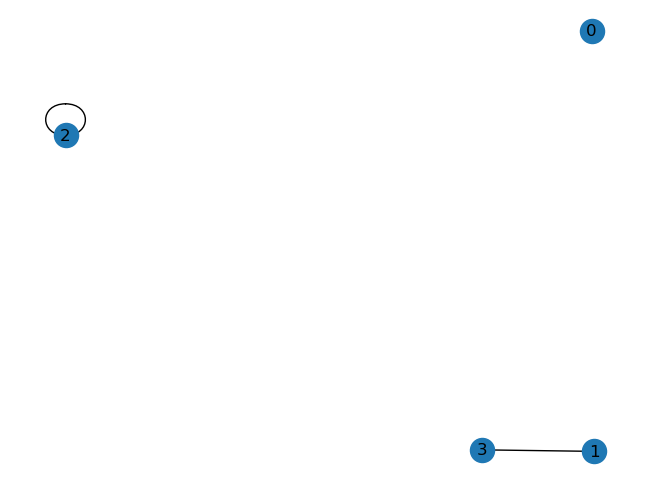

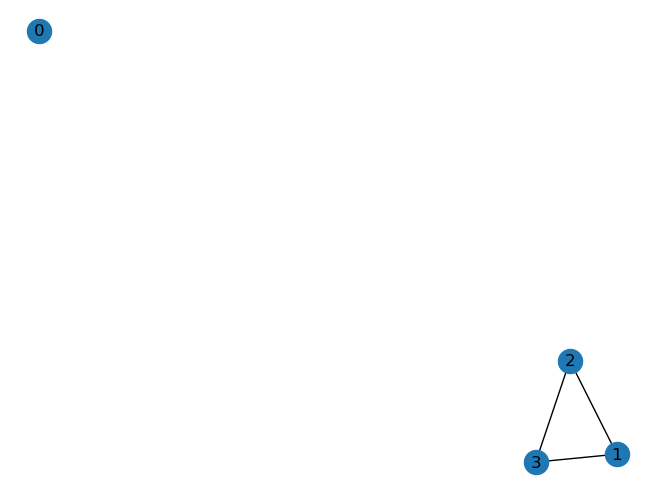

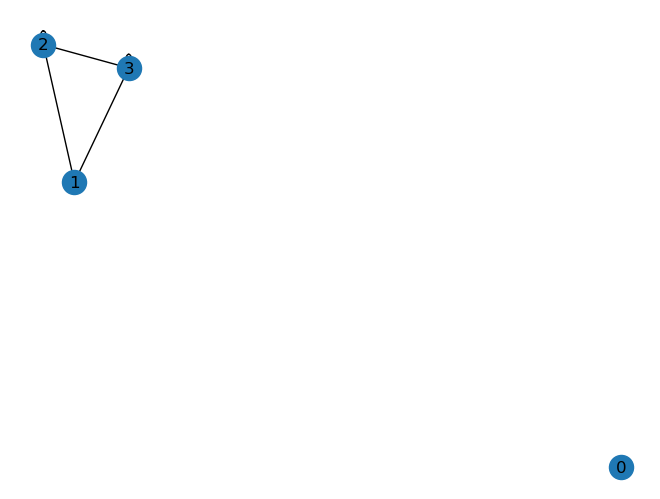

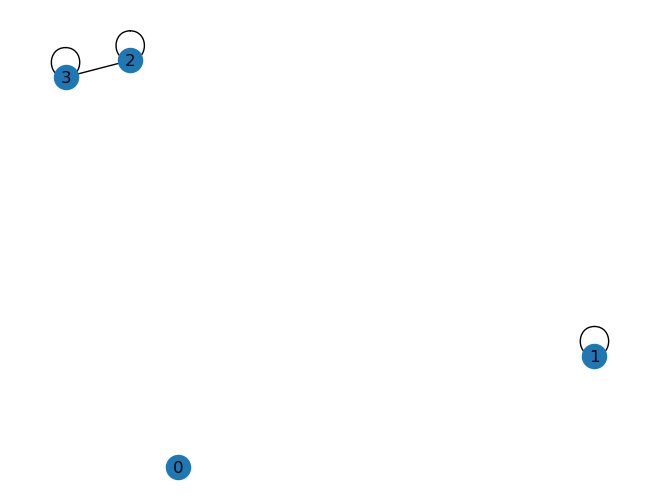

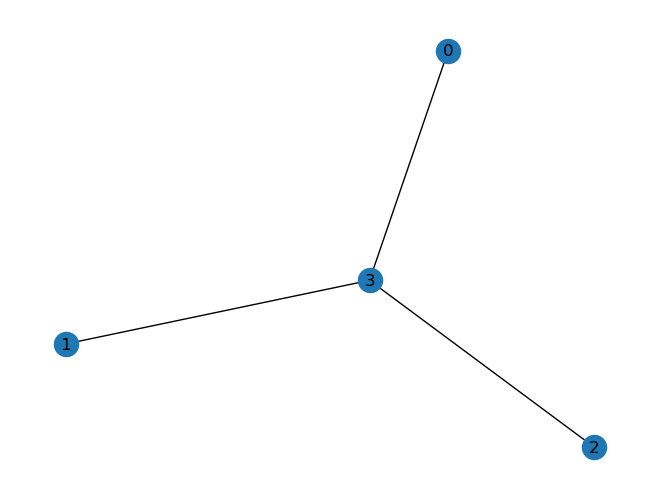

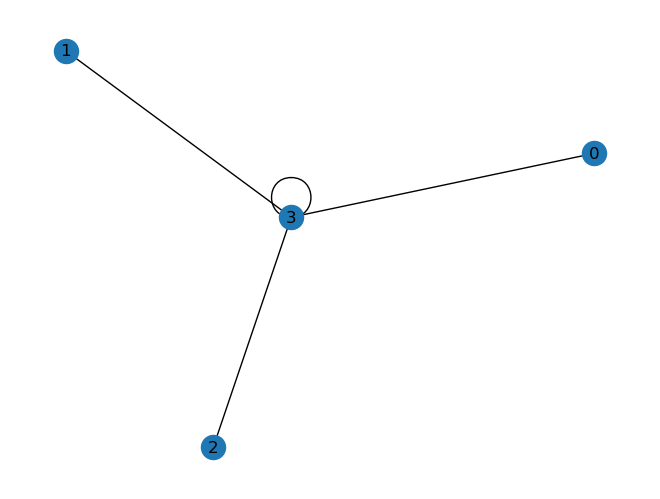

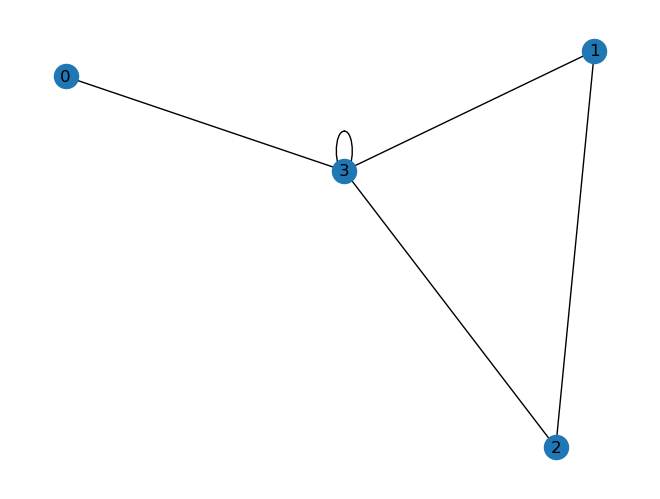

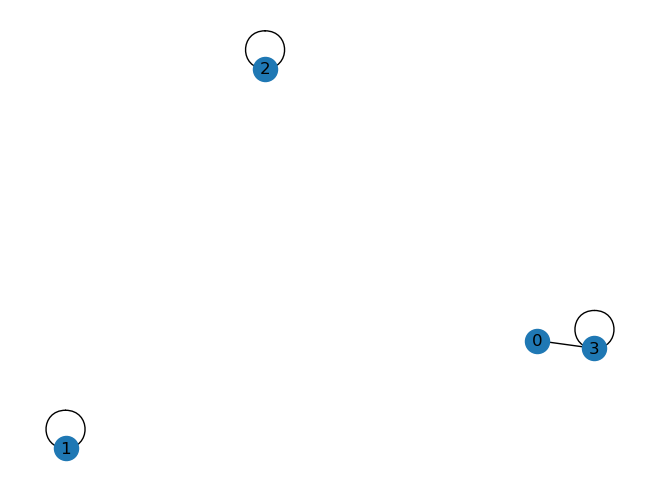

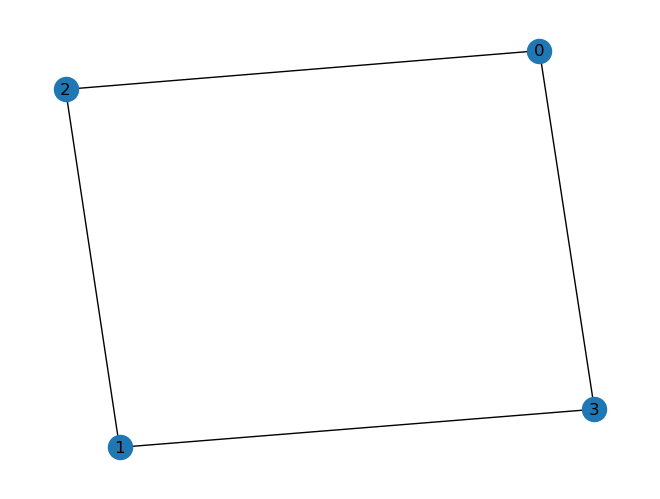

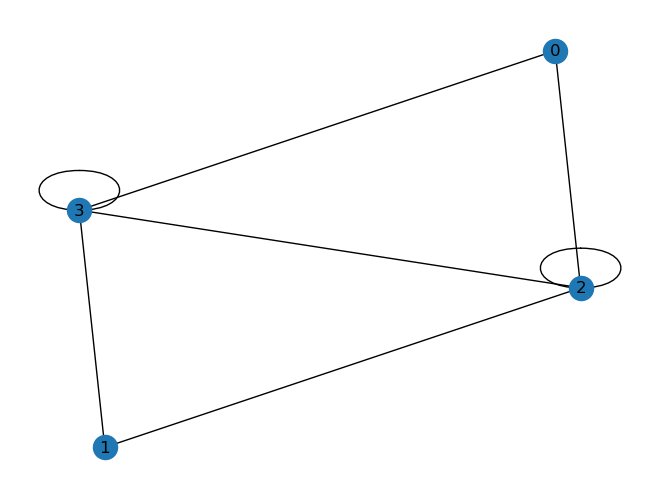

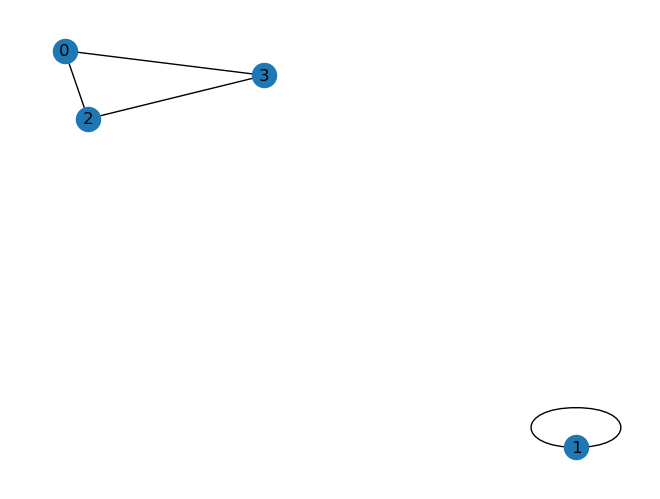

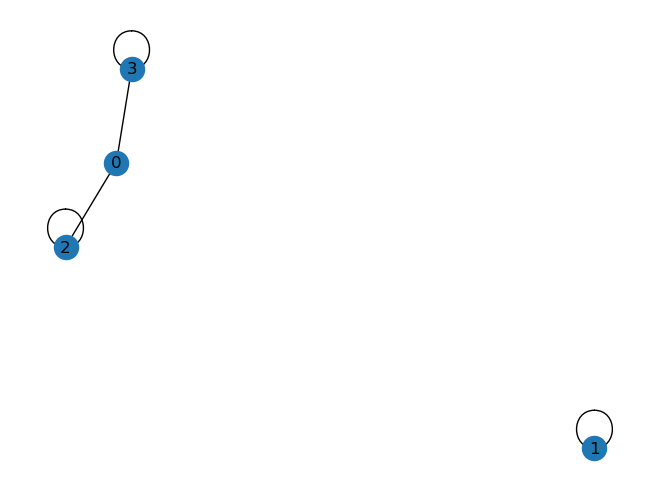

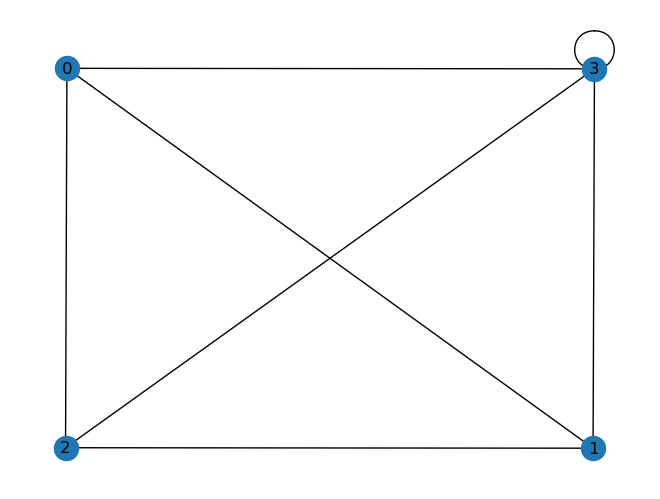

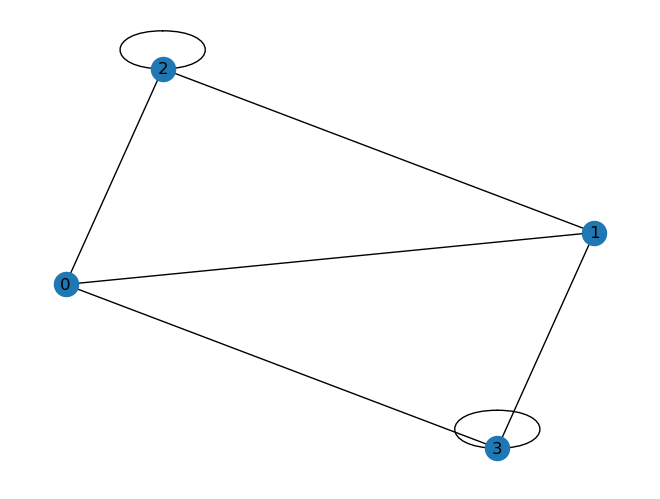

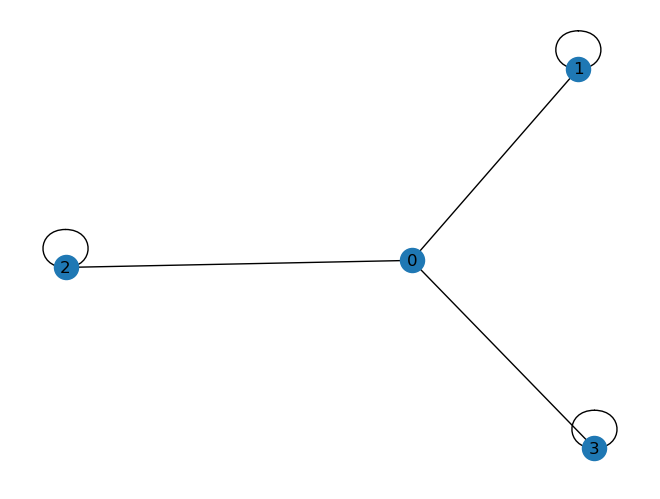

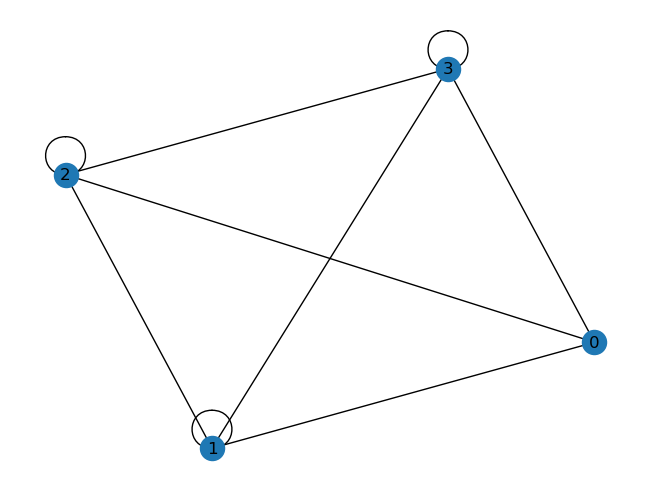

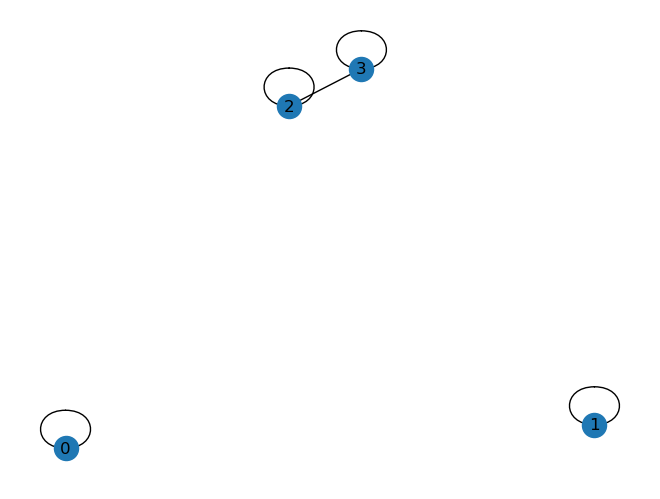

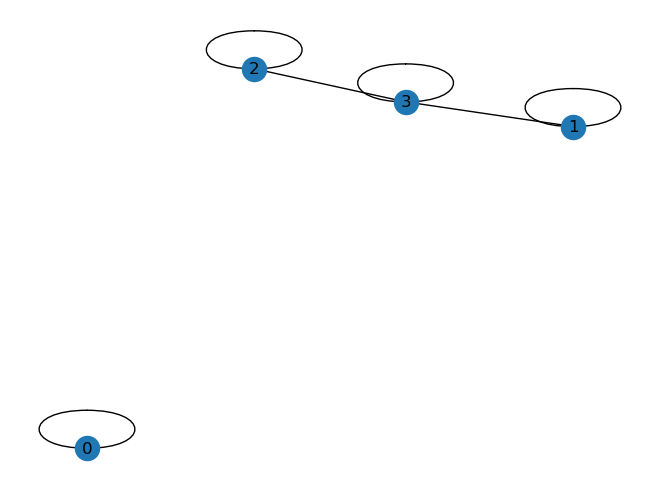

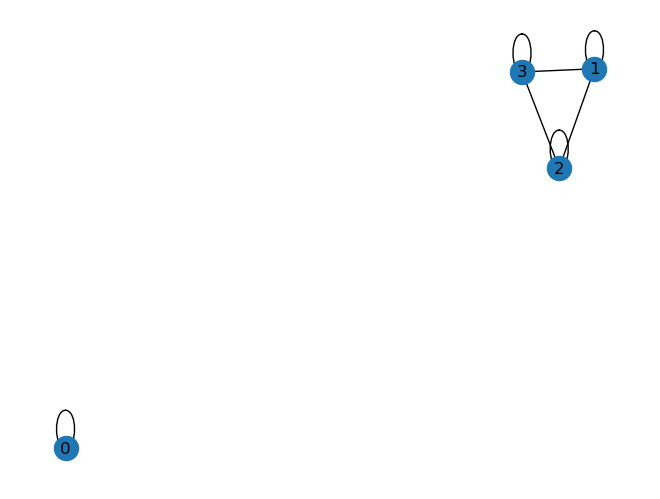

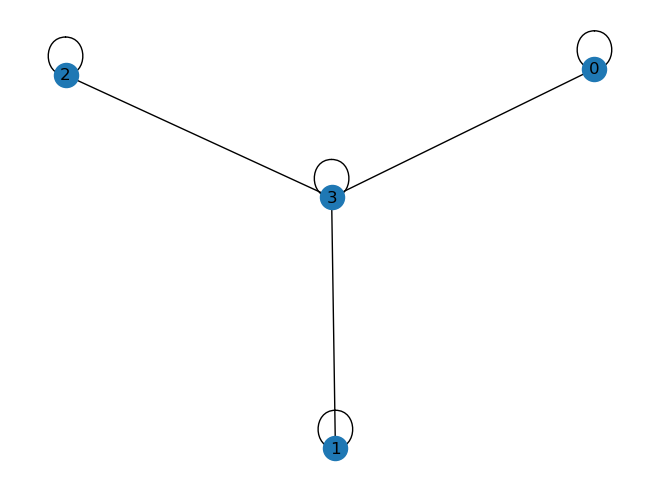

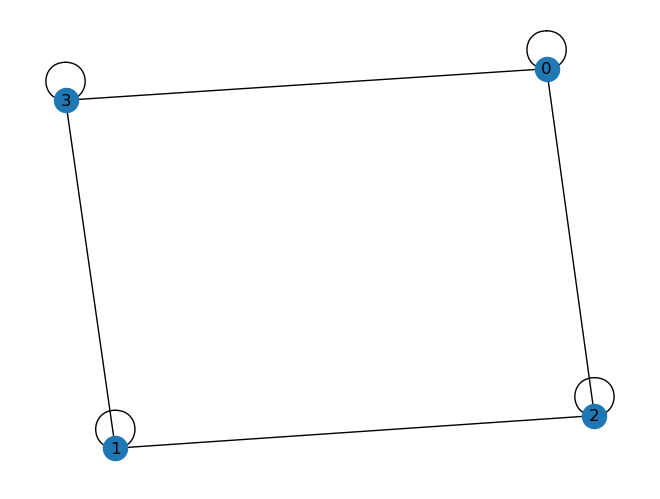

In [4]:
for i, mat in enumerate(matrices):
    G = nx.from_numpy_array(mat)  # build graph from adjacency :contentReference[oaicite:2]{index=2}
    nx.draw(G, with_labels=True)  # basic drawing :contentReference[oaicite:3]{index=3}
    plt.show()